# Predicting App Ratings

In [1]:
# Package importing
import numpy as np
import pandas as pd
from sklearn import preprocessing

import tensorflow as tf
from sklearn.model_selection import train_test_split

### Data preprocessing (Do not run if using google_reviews_summary.csv)

In [22]:
# Reading in the cleaned datasets
summary = pd.read_csv('googlePS_cleaned.csv')
reviews = pd.read_csv('google_reviews_cleaned.csv')

In [23]:
# Integer encoding categorical variables
label = preprocessing.LabelEncoder()

summary['Type'] = label.fit_transform(summary['Type'])
summary['Category'] = label.fit_transform(summary['Category'])
summary['Content Rating'] = label.fit_transform(summary['Content Rating'])
summary['Genres'] = label.fit_transform(summary['Genres'])
summary['Android Ver'] = label.fit_transform(summary['Android Ver'])

reviews['Sentiment'] = label.fit_transform(reviews['Sentiment'])

# Mapping summary data to text review data

## Creating new columns in review database
reviews['Category'] = ''
reviews['Size'] = ''
reviews['Type'] = ''
reviews['Price'] = ''
reviews['Content Rating'] = ''
reviews['Genres'] = ''
reviews['Android Ver'] = ''

for row in reviews.index:
    appInfo = [None] * 8    # Empty list to hold app information, will hold 8 values max
    a = reviews.loc[row, 'App']    # Gets the name of the app from the review dataset
    
    if appInfo[0] == a:    # Checks to see if we already have the rating for the current app
        # Adds relevant information to respective column
        reviews.loc[row, 'Category'] = appRating[1]
        reviews.loc[row, 'Size'] = appInfo[2]
        reviews.loc[row, 'Type'] = appInfo[3]
        reviews.loc[row, 'Price'] = appInfo[4]
        reviews.loc[row, 'Content Rating'] = appInfo[5]
        reviews.loc[row, 'Genres'] = appInfo[6]
        reviews.loc[row, 'Android Ver'] = appInfo[7]
    
    elif summary['App'].eq(a).any():    # Checks to see if the app name is present in the original dataframe
        index = summary[summary['App'] == a].index.values[0]    # Gets the index of the app name
        
        # Saves all relevant information for future and adds information to respective column
        
        appInfo[0] = row
        
        appInfo[1] = summary.loc[index, 'Category']
        reviews.loc[row, 'Category'] = appInfo[1]
        
        appInfo[2] = summary.loc[index, 'Size']
        reviews.loc[row, 'Size'] = appInfo[2]
        
        appInfo[3] = summary.loc[index, 'Type']
        reviews.loc[row, 'Type'] = appInfo[3]
        
        appInfo[4] = summary.loc[index, 'Price']
        reviews.loc[row, 'Price'] = appInfo[4]
        
        appInfo[5] = summary.loc[index, 'Content Rating']
        reviews.loc[row, 'Content Rating'] = appInfo[5]
        
        appInfo[6] = summary.loc[index, 'Genres']
        reviews.loc[row, 'Genres'] = appInfo[6]
        
        appInfo[7] = summary.loc[index, 'Android Ver']
        reviews.loc[row, 'Android Ver'] = appInfo[7]
        
    else:
        reviews.loc[row, 'Category'] = None    # Sets category value to null if app cannot be found. df.dropna will remove all rows with a single null value
        
reviews = reviews.dropna()    # Removes reviews if no valid app score was found

In [24]:
# Removing irrelevant columns
reviews = reviews.drop(columns = ['App', 'Translated_Review'])

In [25]:
# Saving the newly cleaned data
reviews.to_csv('google_reviews_summary.csv', index=False)

### Model Creation

In [6]:
# Load in cleaned data
df = pd.read_csv('google_reviews_summary.csv')

# Should display 11 columns with 24,041 entries
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24041 entries, 0 to 24040
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sentiment               24041 non-null  int64  
 1   Sentiment_Polarity      24041 non-null  float64
 2   Sentiment_Subjectivity  24041 non-null  float64
 3   Rating                  24041 non-null  float64
 4   Review                  24041 non-null  object 
 5   Category                24041 non-null  int64  
 6   Size                    24041 non-null  float64
 7   Type                    24041 non-null  int64  
 8   Price                   24041 non-null  float64
 9   Content Rating          24041 non-null  int64  
 10  Genres                  24041 non-null  int64  
 11  Android Ver             24041 non-null  int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 2.2+ MB


In [7]:
# Dropping text reviews from model

drop = ['Review']
df = df.drop(columns = drop)

In [8]:
# Converting int columns to floats for model
df['Sentiment'] = df['Sentiment'].astype(float)
df['Category'] = df['Category'].astype(float)
df['Type'] = df['Type'].astype(float)
df['Content Rating'] = df['Content Rating'].astype(float)
df['Genres'] = df['Genres'].astype(float)
df['Android Ver'] = df['Android Ver'].astype(float)

In [16]:
# Splitting original data into training and test data with 80:20 split
seed = 684093

y = df['Rating'].copy()
x = df.drop(columns = ['Rating'])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = seed)

In [10]:
print(x.info())
print('---------------------------------------------------------------------------')
print('---------------------------------------------------------------------------')
print(y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24041 entries, 0 to 24040
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sentiment               24041 non-null  float64
 1   Sentiment_Polarity      24041 non-null  float64
 2   Sentiment_Subjectivity  24041 non-null  float64
 3   Category                24041 non-null  float64
 4   Size                    24041 non-null  float64
 5   Type                    24041 non-null  float64
 6   Price                   24041 non-null  float64
 7   Content Rating          24041 non-null  float64
 8   Genres                  24041 non-null  float64
 9   Android Ver             24041 non-null  float64
dtypes: float64(10)
memory usage: 1.8 MB
None
---------------------------------------------------------------------------
---------------------------------------------------------------------------
<class 'pandas.core.series.Series'>
RangeIndex: 24041 ent

**Best model settings so far**

Input Layer:

activation = relu


Hidden Layers:

Neurons = 400
activation 1: relu
activation 2: sigmoid
activation 3: relu


Output Layer:

activation = linear


In [11]:
# Defining our model
model = tf.keras.Sequential([
    # Input Layer
    tf.keras.layers.Dense(10, input_dim = 10, kernel_initializer = 'normal', activation = 'relu'),
    
    # Hidden Layers
    tf.keras.layers.Dense(400, activation = 'relu'),
    tf.keras.layers.Dense(400, activation = 'sigmoid'),
    tf.keras.layers.Dense(400, activation = 'relu'),
    
    # Output Layer
    tf.keras.layers.Dense(1, activation = 'linear')
])

# Compiling the model
model.compile(optimizer = 'adam',
              loss='mean_squared_error',
              metrics = 'mse')    # Regression problems require mean squared error to correctly gauge accuracy

In [12]:
# Fitting the model
model.fit(x_train, y_train, epochs=200)

Epoch 1/200
601/601 [==============================] - 1s 2ms/step - loss: 0.1805 - mse: 0.1805
Epoch 2/200
601/601 [==============================] - 1s 2ms/step - loss: 0.0985 - mse: 0.0985
Epoch 3/200
601/601 [==============================] - 1s 2ms/step - loss: 0.0901 - mse: 0.0901
Epoch 4/200
601/601 [==============================] - 1s 2ms/step - loss: 0.0895 - mse: 0.0895
Epoch 5/200
601/601 [==============================] - 1s 2ms/step - loss: 0.0808 - mse: 0.0808
Epoch 6/200
601/601 [==============================] - 1s 2ms/step - loss: 0.0794 - mse: 0.0794
Epoch 7/200
601/601 [==============================] - 1s 2ms/step - loss: 0.0765 - mse: 0.0765
Epoch 8/200
601/601 [==============================] - 1s 2ms/step - loss: 0.0724 - mse: 0.0724
Epoch 9/200
601/601 [==============================] - 1s 2ms/step - loss: 0.0712 - mse: 0.0712
Epoch 10/200
601/601 [==============================] - 1s 2ms/step - loss: 0.0665 - mse: 0.0665
Epoch 11/200
601/601 [=================

In [13]:
# Model performance
test_loss, test_mse = model.evaluate(x_test, y_test, verbose = True) 

151/151 [==============================] - 0s 752us/step - loss: 0.0028 - mse: 0.0028 


151/151 [==============================] - 0s 676us/step


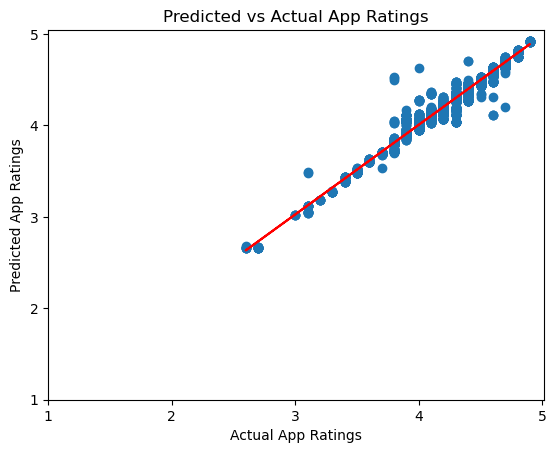

Slope [0.98088116]
Intercept [0.08371149]


In [17]:
# Plotting app rating predictions
import matplotlib.pyplot as plt
%matplotlib inline

# Creating the model predictions
y_pred = model.predict(x_test)
# Slope and intercept for line of best fit
a, b = np.polyfit(y_test, y_pred, deg = 1)

# Plotting predictions vs. actual app ratings
plt.scatter(y_test, y_pred)
# Line of best fit
plt.plot(y_test, a*y_test+b, color='red')
# X and Y axis scale
plt.xticks([1,2,3,4,5])
plt.yticks([1,2,3,4,5])
# Graph labels
plt.xlabel('Actual App Ratings')
plt.ylabel('Predicted App Ratings')
plt.title('Predicted vs Actual App Ratings')
plt.show()

# Print out slope and intercept values
print('Slope', a)
print('Intercept', b)